In [1]:
import h5py
import cv2
import numpy as np
from pathlib import Path
import sys
import matplotlib.pyplot as plt

src = Path.cwd().parent / 'src'
sys.path.append(str(src))

from models.unsupervised_models import *
from postprocessing.postprocessing import *

In [2]:
with h5py.File(r'D:\image_processing_course_project\UBFC-RPPG\preprocessed_data\foreheads.h5') as f:
    frames = np.array(f['subject3'])

In [3]:
frames.shape

(1801, 28, 125, 3)

In [4]:
yhat = ICA_POH(frames, 30)

In [5]:
with open(r'D:\image_processing_course_project\UBFC-RPPG\raw_data\subject3\ground_truth.txt', 'r') as f:
    y_raw = f.read()
y = np.array([float(yy.strip("'")) for yy in y_raw.split('  ')[1:1801]])

In [16]:
ppg2hr_by_window(yhat)

Window frame size of 1 is smaller than minimum pad length of 9. Window ignored!


array([91.40625 , 87.890625, 91.40625 , 98.4375  , 91.40625 , 94.921875])

In [17]:
ppg2hr_by_window(y)

array([ 91.40625 ,  98.4375  , 101.953125,  98.4375  ,  91.40625 ,
        94.921875])

In [18]:
np.mean(np.abs((ppg2hr_by_window(yhat) - ppg2hr_by_window(y))))

Window frame size of 1 is smaller than minimum pad length of 9. Window ignored!


3.515625

(500.0, 600.0)

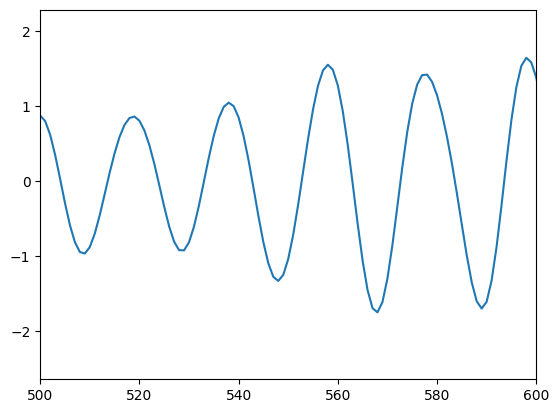

In [11]:
plt.plot(yhat)
plt.xlim(500, 600)

(500.0, 600.0)

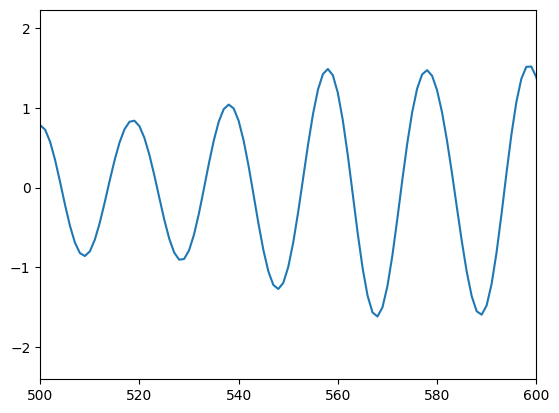

In [12]:
plt.plot(process_signal(yhat))
plt.xlim(500, 600)

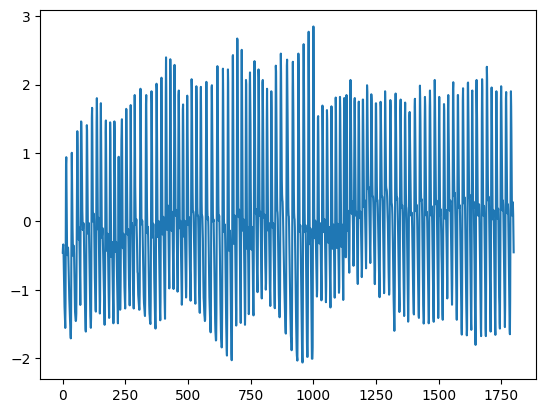

In [15]:
plt.plot(y)
# plt.xlim(500, 600)